Titanic Classification:
make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-ecomonic status, age, gender and more.

importing libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [192]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# EDA

df.dtypes

<AxesSubplot:>

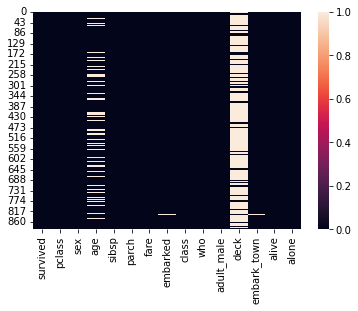

In [193]:
sns.heatmap(df.isnull())

In [194]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

missing values are present

In [195]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
survived,"[0, 1]",2
pclass,"[3, 1, 2]",3
sex,"[male, female]",2
age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",88
sibsp,"[1, 0, 3, 4, 2, 5, 8]",7
parch,"[0, 1, 2, 5, 3, 4, 6]",7
fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248
embarked,"[S, C, Q, nan]",3
class,"['Third', 'First', 'Second'] Categories (3, ob...",3
who,"[man, woman, child]",3


In [196]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [198]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

# data cleaning

In [199]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [200]:
df=df.drop(['deck','who','adult_male','alone','class','embark_town','alive'],axis=1)

In [201]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

In [202]:
def clean(df):
    cols = ["sibsp", "parch", "fare", "age"]
    for col in cols:
        df[col].fillna(df[col].median(), inplace=True)
        
    df.embarked.fillna("S", inplace=True)
    return df
df = clean(df)

In [203]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [204]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


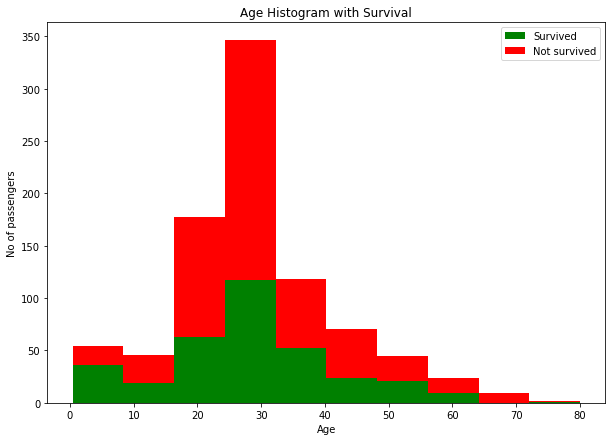

In [205]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['survived']==1]['age'], df[df['survived']==0]['age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

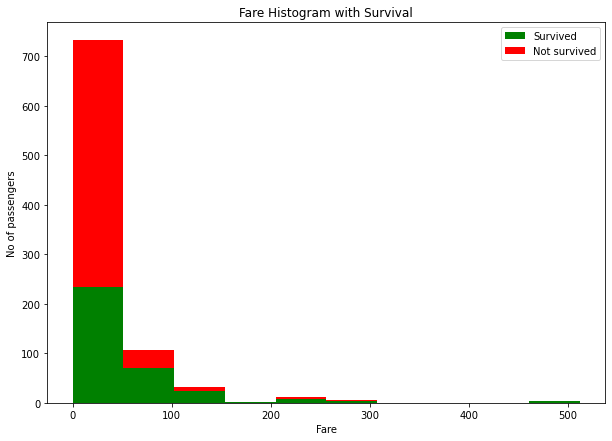

In [206]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['survived']==1]['fare'], df[df['survived']==0]['fare']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

<AxesSubplot:xlabel='sex', ylabel='count'>

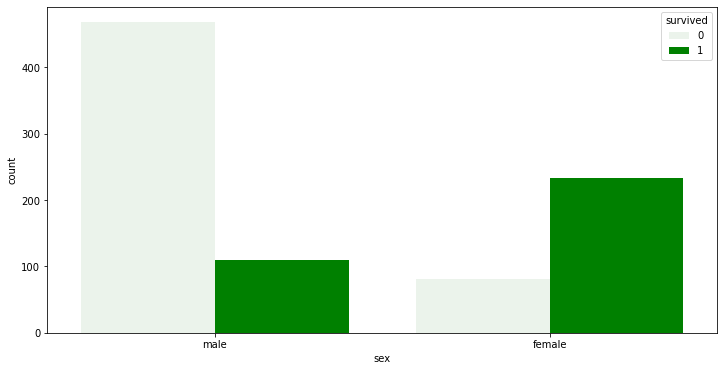

In [207]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'sex' , hue = 'survived' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

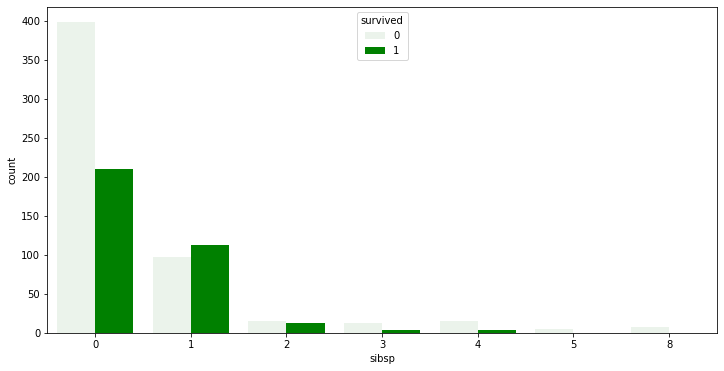

In [208]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'sibsp' , hue = 'survived' , data = df , dodge = True , color = 'Green' , saturation = 1)


<AxesSubplot:xlabel='parch', ylabel='count'>

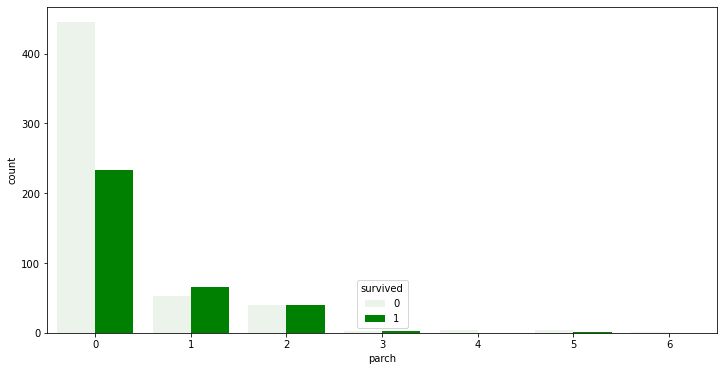

In [209]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'parch' , hue = 'survived' , data = df , dodge = True , color = 'Green' , saturation = 1)

# encoding

In [210]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['embarked'] = labelencoder.fit_transform(df['embarked'])
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


<AxesSubplot:>

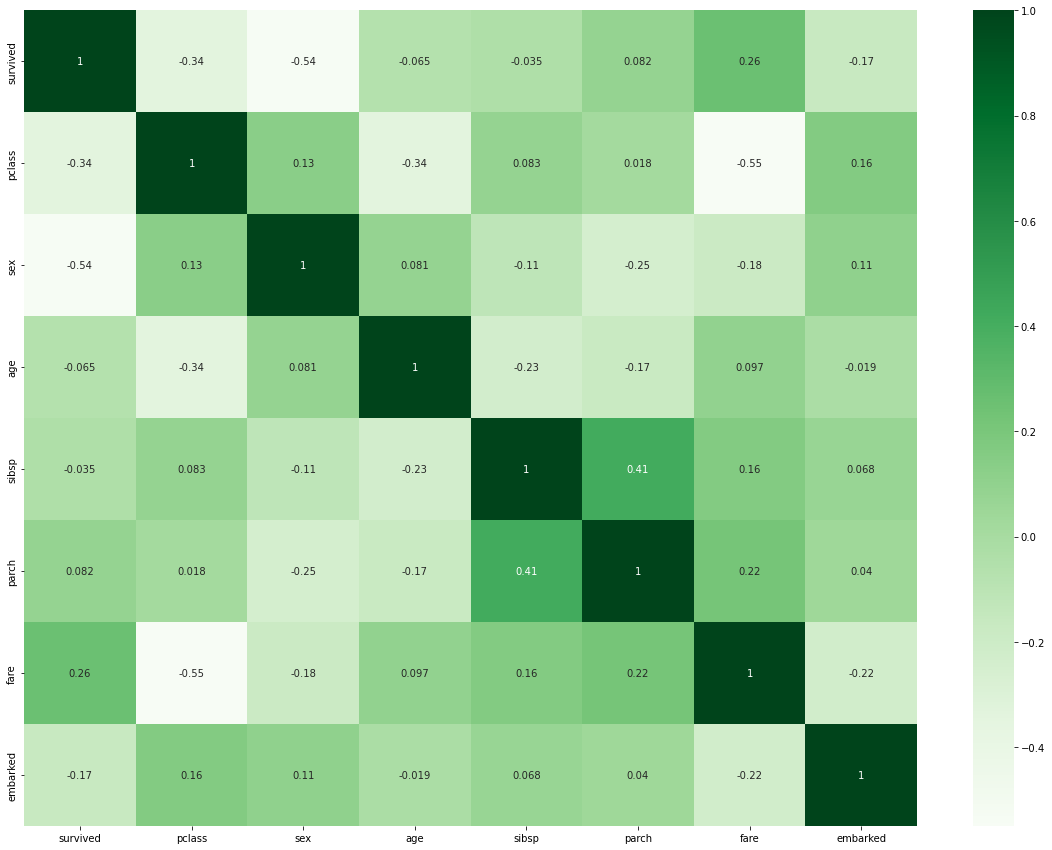

In [222]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [223]:
collist=df.columns.values
ncol=12
nrows=10

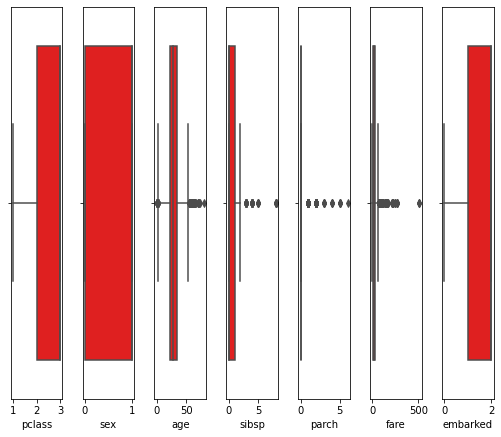

In [224]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red', orient='v')
    plt.tight_layout()

In [225]:
#z score

In [226]:
from scipy.stats import zscore

In [227]:
z=np.abs(zscore(df))
z

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0.789272,0.827377,0.737695,0.565736,0.432793,0.473674,0.502445,0.585954
1,1.266990,1.566107,1.355574,0.663861,0.432793,0.473674,0.786845,1.942303
2,1.266990,0.827377,1.355574,0.258337,0.474545,0.473674,0.488854,0.585954
3,1.266990,1.566107,1.355574,0.433312,0.432793,0.473674,0.420730,0.585954
4,0.789272,0.827377,0.737695,0.433312,0.474545,0.473674,0.486337,0.585954
...,...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.181487,0.474545,0.473674,0.386671,0.585954
887,1.266990,1.566107,1.355574,0.796286,0.474545,0.473674,0.044381,0.585954
888,0.789272,0.827377,1.355574,0.104637,0.432793,2.008933,0.176263,0.585954
889,1.266990,1.566107,0.737695,0.258337,0.474545,0.473674,0.044381,1.942303


In [228]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [229]:
Df=df[(z<3).all(axis=1)]
Df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


all the values that is equal or below from threshold point.

In [230]:
df.shape

(891, 8)

In [231]:
(71/891)*100

7.968574635241302

loosing 8% approx of data

# splitting data

In [232]:
x=Df.drop('survived',axis=1)
y=Df['survived']

# data imbalance

In [233]:
df['survived'].unique()

array([0, 1], dtype=int64)

In [234]:
Df['survived'].value_counts()

0    500
1    320
Name: survived, dtype: int64

In [235]:
(180/500)*100

36.0

 data is approx equal so there is no need to use dat imbalancing

# scaling

In [236]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,pclass,sex,age,sibsp,parch,fare,embarked
0,0.833995,0.722036,-0.611926,1.051956,-0.451141,-0.623707,0.583162
1,-1.586804,-1.384973,0.703210,1.051956,-0.451141,1.525109,-1.953669
2,0.833995,-1.384973,-0.283142,-0.563407,-0.451141,-0.601055,0.583162
3,-1.586804,-1.384973,0.456622,1.051956,-0.451141,0.914918,0.583162
4,0.833995,0.722036,0.456622,-0.563407,-0.451141,-0.596861,0.583162
...,...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.200946,-0.563407,-0.451141,-0.430749,0.583162
816,-1.586804,-1.384973,-0.858515,-0.563407,-0.451141,0.139733,0.583162
817,0.833995,-1.384973,-0.118750,1.051956,3.088912,-0.080071,0.583162
818,-1.586804,0.722036,-0.283142,-0.563407,-0.451141,0.139733,-1.953669


In [237]:
X=dx

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [239]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

# model building

## Linear Support Vector Classifier

In [240]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train.ravel())
predsvc=clf.predict(X_test)        
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8376383763837638
[[154  19]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       173
           1       0.79      0.74      0.77        98

    accuracy                           0.84       271
   macro avg       0.83      0.82      0.82       271
weighted avg       0.84      0.84      0.84       271



Linear Support Vector Classifier Algorithm performing very good and the score is 83%

# decision tree classifier

In [241]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8450184501845018
[[151  22]
 [ 20  78]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       173
           1       0.78      0.80      0.79        98

    accuracy                           0.85       271
   macro avg       0.83      0.83      0.83       271
weighted avg       0.85      0.85      0.85       271



Decision Tree Classifier Algorithm performing very good and the score is 83%

# Kneighbors classifier

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,weights='distance', algorithm='brute')
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8118081180811808
[[152  21]
 [ 30  68]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       173
           1       0.76      0.69      0.73        98

    accuracy                           0.81       271
   macro avg       0.80      0.79      0.79       271
weighted avg       0.81      0.81      0.81       271



KNeighbors Classifier Algorithm performing very good and the score is 81%

# ADA BOOST

In [243]:
ad=AdaBoostClassifier(n_estimators=50, algorithm='SAMME')
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8302583025830258
[[151  22]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       173
           1       0.77      0.76      0.76        98

    accuracy                           0.83       271
   macro avg       0.82      0.81      0.82       271
weighted avg       0.83      0.83      0.83       271



# random forest

In [244]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8523985239852399
[[156  17]
 [ 23  75]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       173
           1       0.82      0.77      0.79        98

    accuracy                           0.85       271
   macro avg       0.84      0.83      0.84       271
weighted avg       0.85      0.85      0.85       271



# cross validation

In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
clf=cross_val_score(clf,X,y,cv=5)
print("Cross Validation Score of LinearSVC:",clf.mean())

Cross Validation Score of LinearSVC: 0.7914634146341463


In [247]:
dtc=cross_val_score(dtc,X,y,cv=5)
print("Cross Validation Score of DTC:",dtc.mean())

Cross Validation Score of DTC: 0.7719512195121953


In [248]:
knn=cross_val_score(knn,X,y,cv=5)
print("Cross Validation Score of KNN:",knn.mean())

Cross Validation Score of KNN: 0.7829268292682927


In [249]:
ad=cross_val_score(ad,X,y,cv=5)
print("Cross Validation Score of AdaBoostClassifier:",ad.mean())

Cross Validation Score of AdaBoostClassifier: 0.7829268292682927


In [250]:
rf=cross_val_score(rf,X,y,cv=5)
print("Cross Validation Score of rf:",rf.mean())

Cross Validation Score of rf: 0.7963414634146342


# hyperparameter tuning

In [251]:
from sklearn.model_selection import GridSearchCV

In [252]:
knn = KNeighborsClassifier()
grid_parameters = {'weights':['uniform','distance'],'algorithm':['brute']}
grid_sr = GridSearchCV(estimator=knn,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_result)
print(best_model)

0.7779816513761467
KNeighborsClassifier(algorithm='brute')


# evaluation metrics

In [253]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [254]:
y_pred_prob=best_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0.2, 0. , 0. , 0. , 0.8, 0.8, 0. , 0.2, 0.8, 0. , 0. , 0. , 0. ,
       0.6, 0. , 0.8, 1. , 0. , 0.8, 0.6, 0. , 0.4, 0. , 1. , 0.2, 1. ,
       0.4, 0.2, 1. , 0.6, 1. , 0. , 0. , 1. , 0.6, 0.8, 0.4, 0.2, 0.2,
       0. , 0. , 1. , 0. , 0.4, 0.8, 0.8, 0.6, 0. , 0.6, 0. , 1. , 0.2,
       0.2, 0.2, 0.8, 0. , 0.4, 1. , 0. , 0. , 0.8, 0. , 0. , 0.4, 0. ,
       0. , 0.2, 0. , 0.4, 0.4, 0. , 0.2, 0.2, 1. , 0.6, 0.2, 0. , 0.4,
       0.4, 0.8, 0.8, 1. , 0.2, 0.2, 0.6, 0. , 0.4, 0.2, 0.6, 0. , 0. ,
       0.8, 0.8, 0. , 1. , 0. , 0. , 0.6, 1. , 0. , 0. , 0. , 0.2, 0.4,
       1. , 1. , 1. , 0. , 0.2, 0. , 0.8, 0. , 0.2, 0.8, 0. , 0.4, 1. ,
       1. , 0. , 0.8, 0.4, 0.2, 0. , 0.4, 0.6, 0.6, 1. , 0.2, 0.4, 0.2,
       0.2, 0. , 0.2, 1. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0.8, 0.8, 0.2,
       0.2, 1. , 0.8, 0. , 0. , 0.2, 0. , 0. , 1. , 0. , 0. , 1. , 0.4,
       0. , 0. , 0. , 0.2, 0. , 0.6, 1. , 0.4, 0.8, 1. , 0. , 0.4, 0. ,
       0.6, 0.2, 0.2, 0. , 0.4, 0. , 0.6, 0. , 0. , 0.2, 0.4, 0.

In [255]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [256]:
fpr

array([0.        , 0.01156069, 0.07514451, 0.15028902, 0.28323699,
       0.53179191, 1.        ])

In [257]:
tpr

array([0.        , 0.37755102, 0.58163265, 0.69387755, 0.84693878,
       0.91836735, 1.        ])

In [258]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

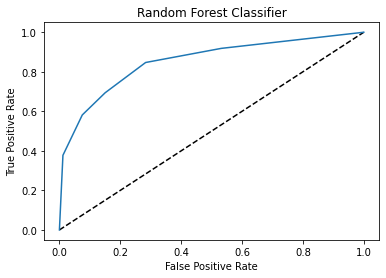

In [259]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [260]:
auc_score=roc_auc_score(y_test,best_model.predict(X_test))
print(auc_score)

0.7717942668396838


The Score of AUC_RUC_Curve is 78%.

saving model

In [261]:
import joblib
joblib.dump(knn,'TitanicModel.obj')

['TitanicModel.obj']

The KNeighbors Classifier algorithm performing Very good and AUC Score is 78% approx that is very good score.